In [1]:
import pandas as pd

data = {
    'Nome': ['João', 'Maria', 'Pedro', 'Ana', 'Luiz'],
    'Idade': [25, 30, 22, 28, 35],
    'Cargo': ['Analista', 'Gerente', 'Analista', 'Coordenador', 'Gerente'],
    'Salário': [3500, 5000, 3200, 4800, 5500],
    'Departamento': ['RH', 'Vendas', 'RH', 'TI', 'Vendas']
}

df = pd.DataFrame(data)
df


,Nome,Idade,Cargo,Salário,Departamento
0,João,25,Analista,3500,RH
1,Maria,30,Gerente,5000,Vendas
2,Pedro,22,Analista,3200,RH
3,Ana,28,Coordenador,4800,TI
4,Luiz,35,Gerente,5500,Vendas


Questão 1: Quais são os **nomes e cargos dos funcionários** que têm salário maior ou igual a 5000?

**Aqui podemos realizar uma filtragem simples com o loc ou com condição lógica para os salários iguais ou maiores que 5000**

In [2]:
# Filtragem com o loc
maior_5000_loc = df.loc[df["Salário"] >= 5000]
maior_5000_loc

# Filtragem com condição lógica
maior_5000 = df[df["Salário"] >= 5000]
maior_5000

,Nome,Idade,Cargo,Salário,Departamento
1,Maria,30,Gerente,5000,Vendas
4,Luiz,35,Gerente,5500,Vendas


Questão 2: **Quantos** funcionários com idade **entre 25 e 30 anos** trabalham no departamento de RH?

**Aqui vamos realizar outro filtragem, nesse caso será com 3 condições sendo a idade entre 25 e 30 anos e o departamento sendo RH**

In [3]:
# Aqui tem um erro na verdade
Funcionarios_RH = df.loc[(df["Idade"]>=25) & (df["Idade"]<=30) & (df["Departamento"]=="RH")]
Funcionarios_RH

,Nome,Idade,Cargo,Salário,Departamento
0,João,25,Analista,3500,RH


In [4]:
# Aqui eu consigo saber quantos trabalham no RH
Funcionarios_RH = df.loc[(df["Departamento"] == "RH")]
Funcionarios_RH["Nome"]

0     João
2    Pedro
Name: Nome, dtype: object

Questão 3: Qual é o **salário médio** dos gerentes no departamento de **Vendas**?

**Aqui também teremos que realizar a filtragem dos elementos agora com o departamento == vendas e depois utilizar a função mean()**

In [5]:
Salario_Medio = df.loc[(df["Departamento"] == "Vendas")]
Salario_Medio

,Nome,Idade,Cargo,Salário,Departamento
1,Maria,30,Gerente,5000,Vendas
4,Luiz,35,Gerente,5500,Vendas


In [6]:
Nome_Salario = Salario_Medio[["Salário","Nome"]]
Nome_Salario

,Salário,Nome
1,5000,Maria
4,5500,Luiz


In [7]:
Nome_Salario = Salario_Medio[["Salário", "Nome"]]
media_salarial = Nome_Salario["Salário"].mean()
media_salarial


5250.0

**O uso do groupby da maneira que você mencionou resultará em uma média de salário para cada combinação única de "Nome" e "Departamento". Isso significa que, para cada nome de funcionário e departamento, você obterá a média de seus salários.**

**Se você deseja calcular a média salarial geral, sem levar em consideração o nome ou o departamento, você pode simplesmente calcular a média da coluna "Salário" diretamente, sem usar o groupby**

In [8]:
# Pensei em fazer pelo groupby, porém aqui teremos o salário médio para cada nome e departamento e não de forma geral
media_mensal = Salario_Medio.groupby(["Nome","Departamento"])["Salário"].mean().sum()
media_mensal

10500.0

In [9]:
soma_media = media_mensal.sum()
soma_media

10500.0

**<h2> Exercicios de análise de dados </h2>**

In [10]:
import pandas as pd
import numpy as np

# Crie um DataFrame de exemplo com dados fictícios de vendas
data = {
    'Data': pd.date_range(start='2023-01-01', periods=100),
    'Loja': np.random.choice(['Norte-Shopping', 'Nova-America', 'Barra-Shopping'], size=100),
    'Produto': np.random.choice(['X', 'Y', 'Z'], size=100),
    'Vendas': np.random.randint(1, 100, size=100),
    'Desconto': np.random.uniform(0, 0.3, size=100)
}

df = pd.DataFrame(data)
df

,Data,Loja,Produto,Vendas,Desconto
0,2023-01-01,Barra-Shopping,X,73,0.041484
1,2023-01-02,Barra-Shopping,Y,97,0.142220
2,2023-01-03,Nova-America,X,31,0.004667
3,2023-01-04,Norte-Shopping,Y,86,0.041806
4,2023-01-05,Nova-America,X,14,0.273667
...,...,...,...,...,...
95,2023-04-06,Nova-America,Y,60,0.041249
96,2023-04-07,Nova-America,Y,89,0.010354
97,2023-04-08,Norte-Shopping,Z,61,0.208145
98,2023-04-09,Barra-Shopping,X,17,0.120085


**Como você calcularia a média das vendas mensais para cada loja?**

Como temos que calcular a média mensal, precisamos primeira selecionar as datas pelos meses.

In [11]:
# criando uma coluna para os meses
df["mês"] = df["Data"].dt.month
df

,Data,Loja,Produto,Vendas,Desconto,mês
0,2023-01-01,Barra-Shopping,X,73,0.041484,1
1,2023-01-02,Barra-Shopping,Y,97,0.142220,1
2,2023-01-03,Nova-America,X,31,0.004667,1
3,2023-01-04,Norte-Shopping,Y,86,0.041806,1
4,2023-01-05,Nova-America,X,14,0.273667,1
...,...,...,...,...,...,...
95,2023-04-06,Nova-America,Y,60,0.041249,4
96,2023-04-07,Nova-America,Y,89,0.010354,4
97,2023-04-08,Norte-Shopping,Z,61,0.208145,4
98,2023-04-09,Barra-Shopping,X,17,0.120085,4


In [12]:
media_mensal = df.groupby(["mês","Loja"])["Vendas"].mean()
media_mensal

mês  Loja          
1    Barra-Shopping    77.777778
     Norte-Shopping    57.250000
     Nova-America      41.100000
2    Barra-Shopping    42.333333
     Norte-Shopping    42.071429
     Nova-America      49.750000
3    Barra-Shopping    48.153846
     Norte-Shopping    59.777778
     Nova-America      53.222222
4    Barra-Shopping    10.000000
     Norte-Shopping    64.333333
     Nova-America      41.600000
Name: Vendas, dtype: float64

In [13]:
media_mensal = df[["Vendas", "mês", "Loja"]]
media_mensal.groupby(["Loja"])["Vendas"].mean()

Loja
Barra-Shopping    53.333333
Norte-Shopping    52.815789
Nova-America      46.750000
Name: Vendas, dtype: float64

In [14]:
media_mensal.groupby(["Loja"])["Vendas"].mean()

Loja
Barra-Shopping    53.333333
Norte-Shopping    52.815789
Nova-America      46.750000
Name: Vendas, dtype: float64

Qual foi a loja que teve o **maior valor** de vendas em um único mês?

In [15]:
vendas_janeiro = media_mensal[media_mensal["mês"]==1]
vendas_janeiro

,Vendas,mês,Loja
0,73,1,Barra-Shopping
1,97,1,Barra-Shopping
2,31,1,Nova-America
3,86,1,Norte-Shopping
4,14,1,Nova-America
5,94,1,Barra-Shopping
6,38,1,Norte-Shopping
7,74,1,Nova-America
8,54,1,Norte-Shopping
9,84,1,Barra-Shopping


In [16]:
vendas_janeiro.groupby(["mês","Loja"])["Vendas"].max().sort_values(ascending=False)

mês  Loja          
1    Norte-Shopping    99
     Barra-Shopping    97
     Nova-America      95
Name: Vendas, dtype: int32

Qual foi o mês com o **menor valor** total de vendas?

In [17]:
menor_mes = media_mensal.groupby(["mês"])["Vendas"].sum().sort_values()
menor_mes

mês
4     421
2    1241
3    1643
1    1798
Name: Vendas, dtype: int32

In [24]:
# Primeiro, agrupe por mês e calcule a soma das vendas para cada mês
total_vendas_por_mes = media_mensal.groupby(["mês"])["Vendas"].sum()

# Encontre o mês com o menor valor total de vendas
mes_com_menor_vendas = total_vendas_por_mes.idxmin()
mes_com_menor_vendas

valor_menor_vendas = total_vendas_por_mes.min()
valor_menor_vendas

421

In [18]:
# Aqui tem um erro, ao utilizar o min() ele calcula a o mínimo de cada mês de forma individual, sem somar todas as vendas e comparar
menor_mes = media_mensal.groupby(["mês"])["Vendas"].min().sort_values()
menor_mes

mês
3    1
4    3
2    5
1    8
Name: Vendas, dtype: int32

In [ ]:
# Primeiro, agrupe por mês e calcule a soma das vendas para cada mês
total_vendas_por_mes = media_mensal.groupby(["mês"])["Vendas"].sum()

# Encontre o mês com o menor valor total de vendas
mes_com_menor_vendas = total_vendas_por_mes.idxmin()
mes_com_menor_vendas

valor_menor_vendas = total_vendas_por_mes.min()
valor_menor_vendas

Como você filtraria apenas as vendas com desconto superior a 20%?

In [19]:
desconto_20 = df.loc[df["Desconto"]>0.20]
desconto_20

desconto_20 = df[df["Desconto"]>0.20]
desconto_20

,Data,Loja,Produto,Vendas,Desconto,mês
4,2023-01-05,Nova-America,X,14,0.273667,1
5,2023-01-06,Barra-Shopping,X,94,0.218231,1
8,2023-01-09,Norte-Shopping,X,54,0.216026,1
9,2023-01-10,Barra-Shopping,Z,84,0.203172,1
14,2023-01-15,Barra-Shopping,Y,90,0.295882,1
15,2023-01-16,Barra-Shopping,X,58,0.250716,1
19,2023-01-20,Barra-Shopping,Z,83,0.209009,1
26,2023-01-27,Norte-Shopping,Z,24,0.219011,1
27,2023-01-28,Norte-Shopping,Z,25,0.228633,1
29,2023-01-30,Barra-Shopping,Y,28,0.266720,1


Como você calcularia as estatísticas resumidas (soma, média e máximo) para cada loja?

In [20]:
estatisticas_loja = df.groupby([df["Loja"]]).agg({
    'Vendas': ['sum', 'mean', 'max'],
    'Desconto': 'mean'
}).reset_index()

estatisticas_loja

Loja Vendas                 Desconto
                     sum       mean max      mean
0  Barra-Shopping   1600  53.333333  98  0.161112
1  Norte-Shopping   2007  52.815789  99  0.151060
2    Nova-America   1496  46.750000  97  0.123102

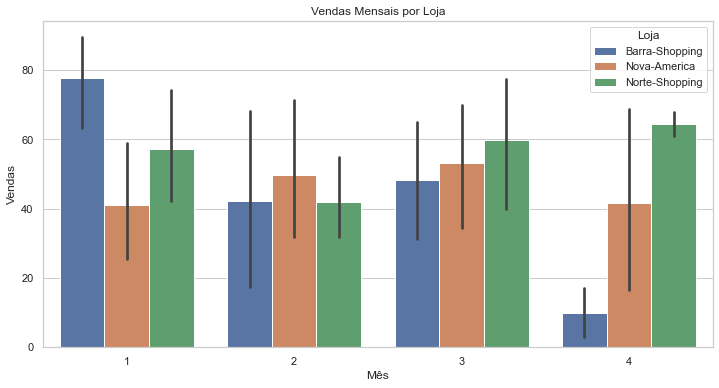

In [21]:
# 4. Criar um gráfico de barras das vendas mensais por loja
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plot = sns.barplot(x="mês", y="Vendas", hue="Loja", data=df)
plt.title('Vendas Mensais por Loja')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()

**Análise times exercicio**

In [26]:
import pandas as pd

data = {
    'Time_casa': ['Flamengo', 'Palmeiras', 'Corinthians', 'São Paulo'],
    'Time_visitante': ['Vasco', 'Santos', 'Grêmio', 'Cruzeiro'],
    'Gols_casa': [2, 3, 1, 2],
    'Gols_visitante': [1, 2, 0, 1],
    'Resultado': ['Vitória', 'Derrota', 'Empate', 'Vitória']
}

partidas_futebol = pd.DataFrame(data)
partidas_futebol


,Time_casa,Time_visitante,Gols_casa,Gols_visitante,Resultado
0,Flamengo,Vasco,2,1,Vitória
1,Palmeiras,Santos,3,2,Derrota
2,Corinthians,Grêmio,1,0,Empate
3,São Paulo,Cruzeiro,2,1,Vitória


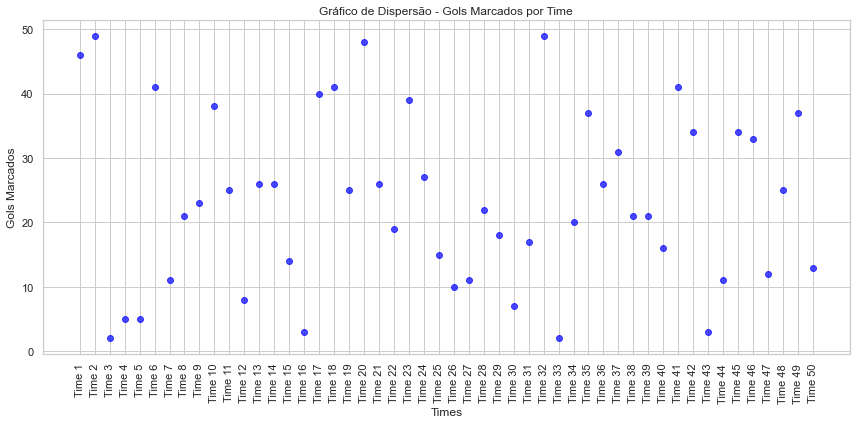

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados aleatórios
np.random.seed(0)
times = [f"Time {i}" for i in range(1, 51)]
gols_marcados = np.random.randint(2, 50, size=50)

# Criar o DataFrame
data = {
    'Time': times,
    'GolsMarcados': gols_marcados
}

df = pd.DataFrame(data)

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['Time'], df['GolsMarcados'], c='blue', marker='o', alpha=0.7)
plt.xlabel('Times')
plt.ylabel('Gols Marcados')
plt.title('Gráfico de Dispersão - Gols Marcados por Time')
plt.xticks(rotation=90)
plt.tight_layout()

# Exibir o gráfico
plt.show()
